# Research Question: Are Entrepreneurs More Food Insecure? 

#### Group 4: Christopher Perez, Ernesto Perez, Kevin Santamaria

# Introduction: 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as st
import math
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('dec19pub.csv')
df2 = pd.read_csv('hhpub19.csv')

# Part I. Merging, Cleaning and Condensing the Data 

In [2]:
# Combining the files based on HouseHold Identifier

In [3]:
df2['H_IDNUM'] = df2['H_IDNUM'].astype(float)

In [4]:
df['HRHHID'] = df['HRHHID'].astype(str)

df['HRHHID2'] = df['HRHHID2'].astype(str)

df['H_IDNUM'] = pd.DataFrame((df['HRHHID'] + df['HRHHID2'])).astype(float)

In [5]:
merged = pd.merge(df, df2, on='H_IDNUM', how='inner')

In [6]:
merged = merged[["HESH2", 'HINC_FR', 'HINC_SE', "H_NUMPER", "HH5TO18", "H_TELHHD", "H_TENURE", "HHINC", "HSEVAL", "HDIS_YN", "HINC_WC", 'HUNITS', 'HED_YN', 'HCSP_YN', 'HWSVAL' ]]
merged

,HESH2,HINC_FR,HINC_SE,H_NUMPER,HH5TO18,H_TELHHD,H_TENURE,HHINC,HSEVAL,HDIS_YN,HINC_WC,HUNITS,HED_YN,HCSP_YN,HWSVAL
0,1,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
1,1,2,2,4,1,1,2,25,0,2,2,1,1,2,60000
2,1,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
3,1,2,2,4,1,1,2,25,0,2,2,1,1,2,60000
4,1,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21837,-1,2,2,4,2,1,1,41,0,2,2,1,2,2,149000
21838,-1,2,2,4,1,1,1,41,0,2,2,1,2,2,163170
21839,-1,2,2,4,2,1,1,41,0,2,2,1,2,2,149000
21840,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
del df
del df2

In [8]:
merged['HESH2'].value_counts()

-1    19303
 2     1696
 1      814
-9       19
-3        7
-2        3
Name: HESH2, dtype: int64

In [9]:
merged['HESH2'] =  merged['HESH2'].map({1:1, 2:0})

In [10]:
merged['HESH2'].value_counts()

0.0    1696
1.0     814
Name: HESH2, dtype: int64

In [11]:
merged

,HESH2,HINC_FR,HINC_SE,H_NUMPER,HH5TO18,H_TELHHD,H_TENURE,HHINC,HSEVAL,HDIS_YN,HINC_WC,HUNITS,HED_YN,HCSP_YN,HWSVAL
0,1.0,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
1,1.0,2,2,4,1,1,2,25,0,2,2,1,1,2,60000
2,1.0,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
3,1.0,2,2,4,1,1,2,25,0,2,2,1,1,2,60000
4,1.0,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21837,NaN,2,2,4,2,1,1,41,0,2,2,1,2,2,149000
21838,NaN,2,2,4,1,1,1,41,0,2,2,1,2,2,163170
21839,NaN,2,2,4,2,1,1,41,0,2,2,1,2,2,149000
21840,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
merged = merged.dropna()

In [13]:
merged

,HESH2,HINC_FR,HINC_SE,H_NUMPER,HH5TO18,H_TELHHD,H_TENURE,HHINC,HSEVAL,HDIS_YN,HINC_WC,HUNITS,HED_YN,HCSP_YN,HWSVAL
0,1.0,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
1,1.0,2,2,4,1,1,2,25,0,2,2,1,1,2,60000
2,1.0,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
3,1.0,2,2,4,1,1,2,25,0,2,2,1,1,2,60000
4,1.0,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20932,1.0,2,2,2,0,1,1,41,0,2,2,1,2,2,91200
20933,1.0,2,2,2,0,1,1,41,0,2,2,1,2,2,91200
20934,1.0,2,2,2,0,1,1,41,0,2,2,1,2,2,91200
21100,0.0,2,2,2,0,2,1,15,0,2,2,1,2,2,0


In [14]:
merged['H_NUMPER'].value_counts()

0     667
2     628
1     428
3     333
4     280
5      92
6      37
7      20
8      14
10     10
9       1
Name: H_NUMPER, dtype: int64

In [15]:
# these 667 people didn't respond to all except two of the questions that we are analyzing

In [16]:
merged = merged[merged['H_NUMPER'] != 0]
merged

,HESH2,HINC_FR,HINC_SE,H_NUMPER,HH5TO18,H_TELHHD,H_TENURE,HHINC,HSEVAL,HDIS_YN,HINC_WC,HUNITS,HED_YN,HCSP_YN,HWSVAL
0,1.0,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
1,1.0,2,2,4,1,1,2,25,0,2,2,1,1,2,60000
2,1.0,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
3,1.0,2,2,4,1,1,2,25,0,2,2,1,1,2,60000
4,1.0,2,2,2,0,1,1,39,0,2,2,1,2,2,75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20932,1.0,2,2,2,0,1,1,41,0,2,2,1,2,2,91200
20933,1.0,2,2,2,0,1,1,41,0,2,2,1,2,2,91200
20934,1.0,2,2,2,0,1,1,41,0,2,2,1,2,2,91200
21100,0.0,2,2,2,0,2,1,15,0,2,2,1,2,2,0


In [17]:
merged['HINC_WC'].value_counts()

2    1829
1      14
Name: HINC_WC, dtype: int64

In [18]:
merged['HINC_FR'] = merged['HINC_FR'].map({1:1, 2:0})
merged['HINC_SE'] = merged['HINC_SE'].map({1:1, 2:0})
merged['H_TELHHD'] = merged['H_TELHHD'].map({1:1, 2:0})
merged['H_TENURE'] = merged['H_TENURE'].map({1:1, 2:0, 3:0})
merged['HDIS_YN'] = merged['HDIS_YN'].map({1:1, 2:0})
merged['HINC_WC'] = merged['HINC_WC'].map({1:1, 2:0})

In [19]:
merged

,HESH2,HINC_FR,HINC_SE,H_NUMPER,HH5TO18,H_TELHHD,H_TENURE,HHINC,HSEVAL,HDIS_YN,HINC_WC,HUNITS,HED_YN,HCSP_YN,HWSVAL
0,1.0,0,0,2,0,1,1,39,0,0,0,1,2,2,75000
1,1.0,0,0,4,1,1,0,25,0,0,0,1,1,2,60000
2,1.0,0,0,2,0,1,1,39,0,0,0,1,2,2,75000
3,1.0,0,0,4,1,1,0,25,0,0,0,1,1,2,60000
4,1.0,0,0,2,0,1,1,39,0,0,0,1,2,2,75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20932,1.0,0,0,2,0,1,1,41,0,0,0,1,2,2,91200
20933,1.0,0,0,2,0,1,1,41,0,0,0,1,2,2,91200
20934,1.0,0,0,2,0,1,1,41,0,0,0,1,2,2,91200
21100,0.0,0,0,2,0,0,1,15,0,0,0,1,2,2,0


# Part II. Descriptive Statistics for Entrepreneurs and Non-Entrepreneurs 

In [20]:
Non_Ent = merged[(merged.HINC_SE == 0)]
Ent = merged[(merged.HINC_SE == 1)]

In [21]:
ne_top_keys = Non_Ent['HHINC'].value_counts().index
ne_top_values = Non_Ent['HHINC'].value_counts().tolist()/Non_Ent['HHINC'].value_counts().sum()

e_top_keys = Ent['HHINC'].value_counts().index
e_top_values = Ent['HHINC'].value_counts().tolist()/Ent['HHINC'].value_counts().sum()

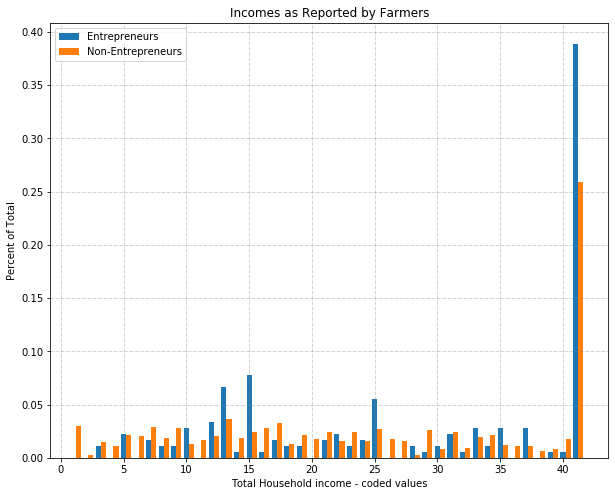

In [22]:
x1 = e_top_keys
x2 = ne_top_keys
y1 = e_top_values
y2 = ne_top_values

plt.figure(figsize=(10,8))
width = 0.40   
plt.bar(x1, y1, width, label='Entrepreneurs')
plt.bar(x2 + width, y2 , width, label='Non-Entrepreneurs')

plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.7)

plt.ylabel('Percent of Total')
plt.xlabel('Total Household income - coded values')
plt.title('Incomes as Reported by Farmers')
plt.legend(loc='best')
plt.show()

In [23]:
# Almost half of self-employed farmers reported incomes over $100k (Value = 41 in DF), 
# The second and third most common incomes reported were $35,000 to $37,499 (15) and $30,000 to $32,499 (13). 

# Likewise, the most common response for Non-Entrepreneurs was also 41 (over $100k) .
# The second and third most common responses were 13 ($30,000 to $32,499) and 17 ($40,000 to $42,499). 

### b. Self-Employment Income

In [24]:
# log Transformations

In [25]:
Non_E_log = np.log(Non_Ent['HWSVAL'])

In [26]:
E_log = np.log(Ent['HSEVAL'])

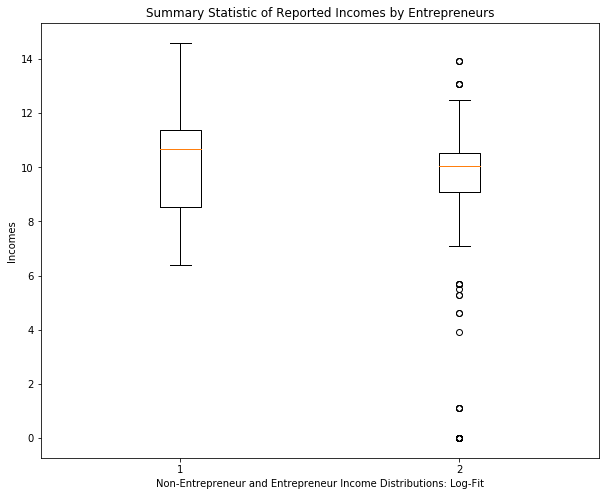

In [27]:
plt.figure(figsize=(10, 8))
plt.boxplot([Non_E_log , E_log])
plt.xlabel('Non-Entrepreneur and Entrepreneur Income Distributions: Log-Fit')
plt.ylabel('Incomes')
plt.title('Summary Statistic of Reported Incomes by Entrepreneurs')
plt.show()

In [28]:
# Cube Transformations 

In [29]:
Non_E_Cube = np.cbrt(Non_Ent['HWSVAL'])

In [30]:
E_Cube = np.cbrt(Ent['HSEVAL'])

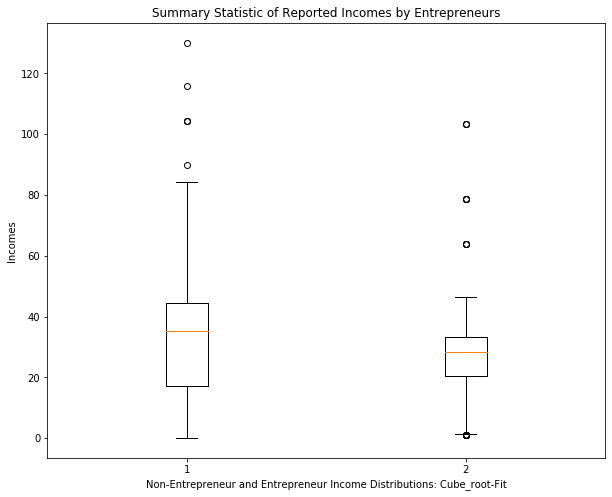

In [31]:
plt.figure(figsize=(10, 8))
plt.boxplot([Non_E_Cube, E_Cube])
plt.xlabel('Non-Entrepreneur and Entrepreneur Income Distributions: Cube_root-Fit')
plt.ylabel('Incomes')
plt.title('Summary Statistic of Reported Incomes by Entrepreneurs')
plt.show()

### Are these results statistically significant? 

In [32]:
def hypothesis_test(p):
    if p <= 0.05: return 'Reject the Null'
    else: return 'Fail to Reject the Null'

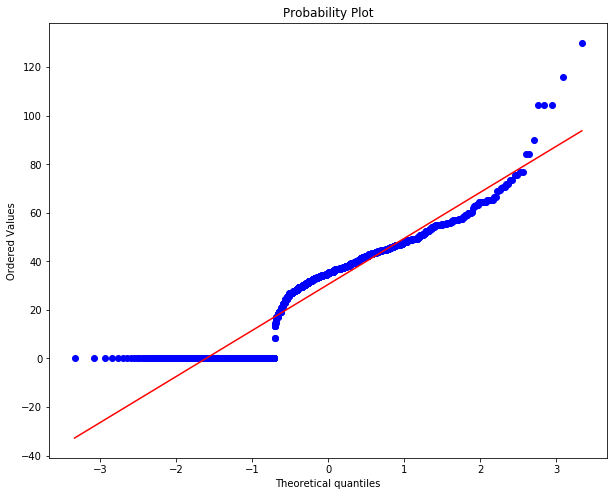

In [33]:
plt.figure(figsize=(10, 8))
st.probplot(Non_E_Cube,dist='norm', fit=True, plot=plt)
plt.show()

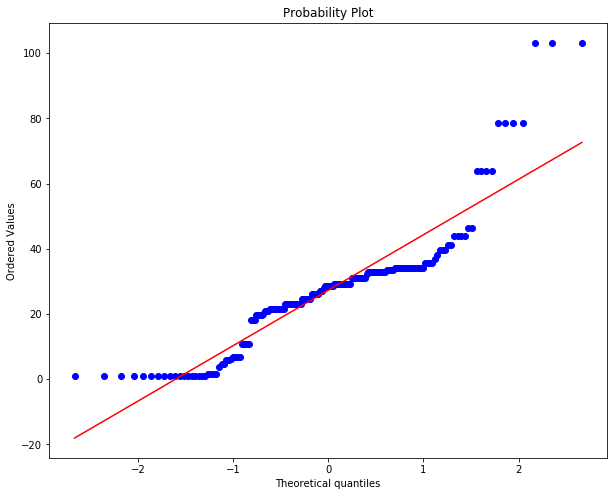

In [34]:
plt.figure(figsize=(10, 8))
st.probplot(E_Cube ,dist='norm', fit=True, plot=plt)
plt.show()

In [35]:
hypothesis_test(st.normaltest(Non_E_Cube)[1])

'Reject the Null'

In [36]:
hypothesis_test(st.normaltest(E_Cube)[1])

'Reject the Null'

### Central Limit Theorem

In [37]:
Ent['HSEVAL'] = np.cbrt(Ent['HSEVAL'])
Non_Ent['HWSVAL'] = np.cbrt(Non_Ent['HWSVAL'])

In [38]:
import random
from statistics import mean

numSamples = 100
sizeSample = 30


entSamplesHSEVAL = list()
nonEntSamplesHWSVAL = list()


for i in range(numSamples):

    entSampleHSEVAL = list()
    nonEntSampleHWSVAL = list()


    for j in range(sizeSample):

        nEnt = random.randint(0, np.shape(Ent)[0] - 1)
        nNon_Ent = random.randint(0, np.shape(Non_Ent)[0] - 1)


        entHSEVAL = Ent['HSEVAL'].iat[nEnt]
        nonEntHWSVAL = Non_Ent['HWSVAL'].iat[nNon_Ent]


        entSampleHSEVAL.append(entHSEVAL)
        nonEntSampleHWSVAL.append(nonEntHWSVAL)


    entSamplesHSEVAL.append(mean(entSampleHSEVAL))
    nonEntSamplesHWSVAL.append(mean(nonEntSampleHWSVAL))
    

In [39]:
hypothesis_test(st.normaltest(entSamplesHSEVAL)[1])

'Fail to Reject the Null'

In [40]:
hypothesis_test(st.normaltest(nonEntSamplesHWSVAL)[1])

'Fail to Reject the Null'

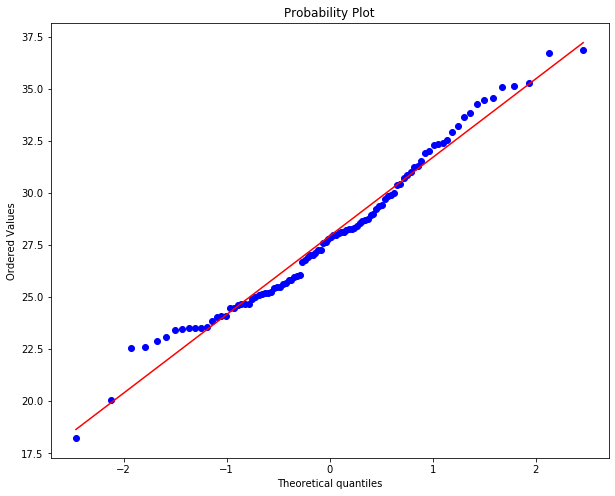

In [41]:
plt.figure(figsize=(10, 8))
st.probplot(entSamplesHSEVAL ,dist='norm', fit=True, plot=plt)
plt.show()

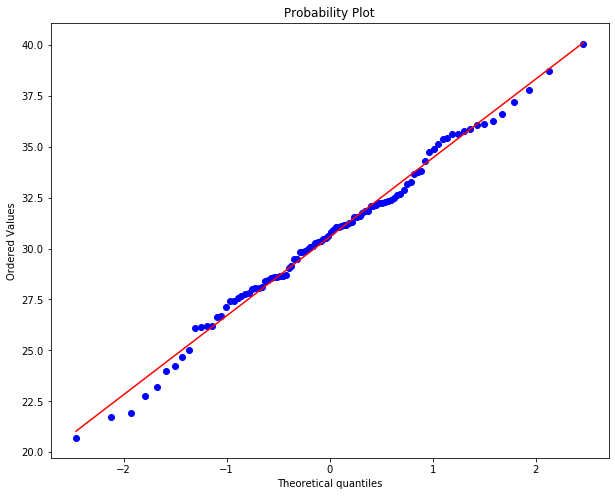

In [42]:
plt.figure(figsize=(10, 8))
st.probplot(nonEntSamplesHWSVAL ,dist='norm', fit=True, plot=plt)
plt.show()

### Testing for Variance 

In [43]:
hypothesis_test(st.levene(entSamplesHSEVAL, nonEntSamplesHWSVAL)[1])

'Fail to Reject the Null'

### T-Test

In [44]:
hypothesis_test(st.ttest_ind(entSamplesHSEVAL, nonEntSamplesHWSVAL)[1])

'Reject the Null'

In [45]:
# The differences in wages between entrepreneurs and non-entrepreneurs are indeed statistically significant. 

# Part III. Modeling 

### Spliting data into train and test sets

In [46]:
train, test = train_test_split(merged, test_size=0.2)

In [47]:
# Defining the Logit model

In [48]:
result2 = smf.logit('HESH2 ~ HINC_FR + HINC_SE + H_NUMPER + HH5TO18 + H_TELHHD + H_TENURE + HHINC + HDIS_YN + HINC_WC', data=train).fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.610226
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.025     
Dependent Variable: HESH2            AIC:              1818.9451 
Date:               2021-04-20 03:04 BIC:              1871.9024 
No. Observations:   1474             Log-Likelihood:   -899.47   
Df Model:           9                LL-Null:          -922.73   
Df Residuals:       1464             LLR p-value:      4.8114e-07
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.2262    0.3676  -0.6153  0.5384  -0.9468   0.4943
HINC_FR       -0.2328    0.4137  -0.5627  0.5737  -1.0437   0.

In [49]:
# Dropping insignificant Regressors

In [50]:
logit = smf.logit('HESH2 ~ HINC_SE + H_TENURE + HDIS_YN', data=train).fit()
print(logit.summary2())

Optimization terminated successfully.
         Current function value: 0.611121
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.024     
Dependent Variable: HESH2            AIC:              1809.5854 
Date:               2021-04-20 03:04 BIC:              1830.7684 
No. Observations:   1474             Log-Likelihood:   -900.79   
Df Model:           3                LL-Null:          -922.73   
Df Residuals:       1470             LLR p-value:      1.5971e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.5048    0.1001  -5.0456  0.0000  -0.7010  -0.3087
HINC_SE       -1.1573    0.2470  -4.6848  0.0000  -1.6414  -0.

### Analyzing the Marginal Effects

In [51]:
margeff = logit.get_margeff(at = 'mean', method = 'dydx')
margeff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                  HESH2
Method:                          dydx
At:                              mean
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
HINC_SE       -0.2486      0.052     -4.748      0.000      -0.351      -0.146
H_TENURE      -0.0586      0.026     -2.251      0.024      -0.110      -0.008
HDIS_YN        0.3724      0.109      3.431      0.001       0.160       0.585
==============================================================================
"""

### Validation: K-Fold Cross-Validation

In [52]:
X = train[['HINC_SE', 'H_TENURE', 'HDIS_YN']]
y = train['HESH2']

### Making out of Sample Predictions

In [53]:
test['prediction'] = logit.predict(test)

In [54]:
pd.crosstab(test['HESH2'], test['prediction'], margins=True)

prediction,0.1261929553117662,0.15947957753198816,0.3147968305768096,0.37640254922089966,0.449796417651856,0.7222733323649326,0.7735924163308087,All
HESH2,,,,,,,,
0.0,17,3,146,81,2,0,1,250
1.0,6,2,66,41,1,1,2,119
All,23,5,212,122,3,1,3,369
